In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## 1. For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:ylabel='MEDV'>

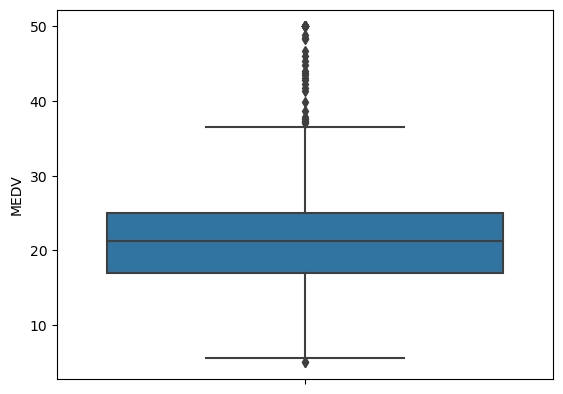

In [5]:
sns.boxplot(y='MEDV', data=boston_df)

The boxplot above shows the plot of the Median value of owner-occupied homes in $1000's,  The total number of observations in the dataset is 506. The median value of the data, which separates the data into two equal halves, is 21.20. The middle of the data falls between 17.025 and 25.00, as indicated by the first quartile (Q1) and third quartile (Q3) values. The range of the data, represented by the minimum and maximum values, is quite large, with values ranging from 5.00 to 50.00. The mean value of the data is 22.532806, which provides an overall measure of central tendency for the dataset.

## 2. Provide a  bar plot for the Charles river variable

In [6]:
charles_river_dummy = boston_df["CHAS"].value_counts().to_frame().reset_index()
charles_river_dummy.columns = ['unique_values','counts']

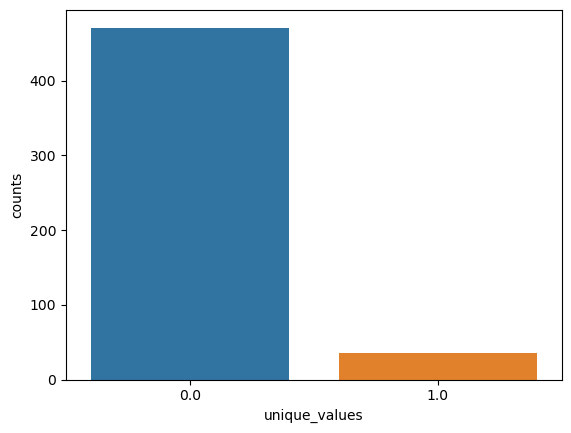

In [7]:
sns.barplot(x = "unique_values", y = "counts", data=charles_river_dummy);

The bar graph shows that the majority of houses are not near the Charles River

## 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [8]:
boston_df.loc[(boston_df['AGE']<35),'age_group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']= "between 35 and 70 years"
boston_df.loc[(boston_df['AGE']>70),'age_group'] = "70 years and older"

In [9]:
thirty5_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty5_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']


<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

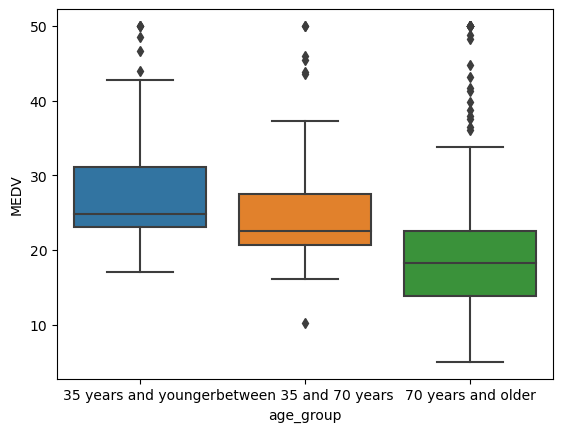

In [10]:
data = {'age_group': ['35 years and younger'] * len(thirty5_lower) + ['between 35 and 70 years'] * len(thirty5_seventy) + ['70 years and older'] * len(seventy_older),
        'MEDV': thirty5_lower.tolist() + thirty5_seventy.tolist() + seventy_older.tolist()}
df = pd.DataFrame(data)

sns.boxplot(x='age_group', y='MEDV', data=df)


The boxplot shows average, and minimum value of owner occupied homes is higher when the age is lower

## 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

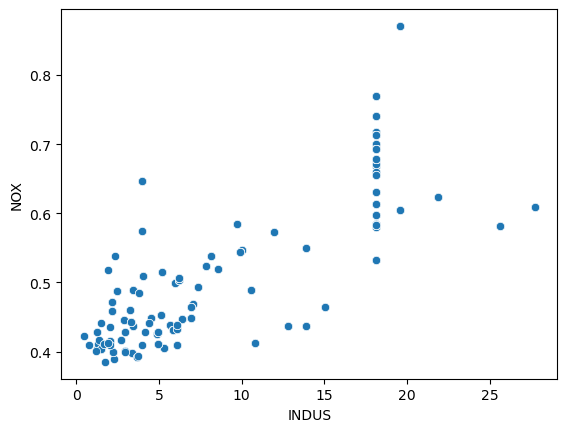

In [19]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

There is a positive correlation between non-retail business acres per town and nitric oxide concentrations

## 5. Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

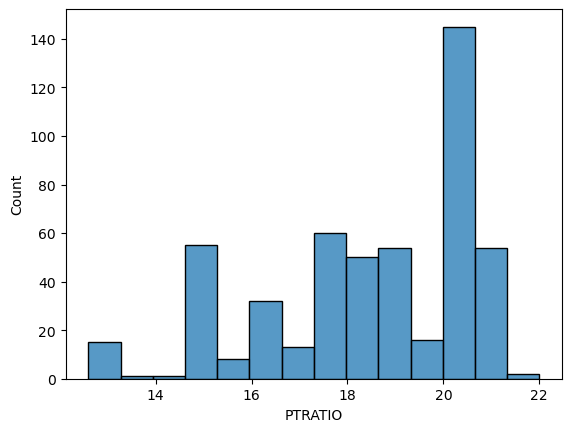

In [12]:
sns.histplot(data=boston_df, x='PTRATIO')

## 6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: No significant differecne in median values of houses and not bounded by the charles river or not 
H1: There is a sifinicant differecne in median values of houses and not bounded by the charles river or not 

In [13]:
scipy.stats.ttest_ind(boston_df['CHAS'],boston_df['MEDV']) 

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

The t-statistic is -54.9210289745203, which indicates that the difference between the two group means is very large. The p-value is 1.4651540072350996e-305, which is extremely small and close to zero. We can conclude that there is a statistically significant difference between the means of the two groups being compared.

## 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There is no statistical difference betweenMedian values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
H1: There is statistical difference betweenMedian values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)   

In [14]:
boston_df.loc[(boston_df['AGE']<35),'age_group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']= "between 35 and 70 years"
boston_df.loc[(boston_df['AGE']>70),'age_group'] = "70 years and older"

In [15]:
thirty5_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty5_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [16]:
f_statistic, p_value = scipy.stats.f_oneway(thirty5_lower, thirty5_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


There is a significant difference between the variances of the two populations

## 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: Nitric oxide concentration is not correlated to proportion of of non-retail business acres per town
H1: Nitric oxide concentration is correlated to proportion of of non-retail busines    

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

There is a strong positive linear relationship between the two variables being compared, and this relationship is statistically significant.

## 9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        08:11:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 shows that there is an additional weighted distace.